In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [ ]:
import os
drive_path = '/content/drive/MyDrive/CNN Implementation/dataset'

In [ ]:
for dirname, _, filenames in os.walk('drive_path'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/CNN Implementation/dataset/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)



In [ ]:
type(X_train)

list

In [ ]:
type(labels)

list

In [ ]:
for i in labels:
  folderPath = os.path.join('/content/drive/MyDrive/CNN Implementation/dataset/Testing',i)
  for j in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath,j))
    img = cv2.resize(img,(image_size,image_size))
    X_train.append(img)
    Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
labels

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [ ]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
from tensorflow.keras import layers as L

input_shape=(150,150,3)
inputs = L.Input(input_shape)
x = L.Conv2D(filters=32,kernel_size=3, activation = "relu",padding="same")(inputs)
x = L.Conv2D(filters=64,kernel_size=3, activation = "relu",padding="same")(x)
x = L.MaxPool2D(pool_size=(2,2))(x)
x = L.Dropout(0.3)(x) ## droping 30 % of the neurons to avoid overfitting

x = L.Conv2D(filters=64,kernel_size=3, activation = "relu",padding="same")(x)
x = L.Conv2D(filters=64,kernel_size=3, activation = "relu",padding="same")(x)
x = L.MaxPool2D(pool_size=(2,2))(x)
x = L.Dropout(0.3)(x)

x = L.Conv2D(filters=128,kernel_size=3, activation = "relu",padding="same")(x)
x = L.Conv2D(filters=128,kernel_size=3, activation = "relu",padding="same")(x)
x = L.Conv2D(filters=128,kernel_size=3, activation = "relu",padding="same")(x)
x = L.MaxPool2D(pool_size=(2,2))(x)
x = L.Dropout(0.3)(x)

x = L.Conv2D(filters=128,kernel_size=3, activation = "relu",padding="same")(x)
x = L.Conv2D(filters=256,kernel_size=3, activation = "relu",padding="same")(x)
x = L.MaxPool2D(pool_size=(2,2))(x)
x= L.Dropout(0.3)(x)








x = L.Flatten()(x)
x = L.Dense(512, activation = "relu")(x)

x = L.Dense(512, activation = "relu")(x)
x= L.Dropout(0.3)(x)

outputs = L.Dense(4, activation="softmax")(x)

model = tf.keras.models.Model(inputs, outputs)




In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        36928     
                                                             

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 24s 154ms/step - loss: 2.3387 - accuracy: 0.3292 - val_loss: 1.3166 - val_accuracy: 0.4150
Epoch 2/20
83/83 [==============================] - 9s 111ms/step - loss: 1.0961 - accuracy: 0.5131 - val_loss: 1.0423 - val_accuracy: 0.5510
Epoch 3/20
83/83 [==============================] - 9s 111ms/step - loss: 0.9297 - accuracy: 0.5823 - val_loss: 0.9236 - val_accuracy: 0.5816
Epoch 4/20
83/83 [==============================] - 9s 110ms/step - loss: 0.7828 - accuracy: 0.6534 - val_loss: 0.7415 - val_accuracy: 0.6531
Epoch 5/20
83/83 [==============================] - 9s 112ms/step - loss: 0.7102 - accuracy: 0.6916 - val_loss: 0.7000 - val_accuracy: 0.6973
Epoch 6/20
83/83 [==============================] - 9s 111ms/step - loss: 0.6106 - accuracy: 0.7473 - val_loss: 0.8082 - val_accuracy: 0.6463
Epoch 7/20
83/83 [==============================] - 9s 113ms/step - loss: 0.5271 - accuracy: 0.7896 - val_loss: 0.6396 - val_accuracy: 0.7177
Epoch

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

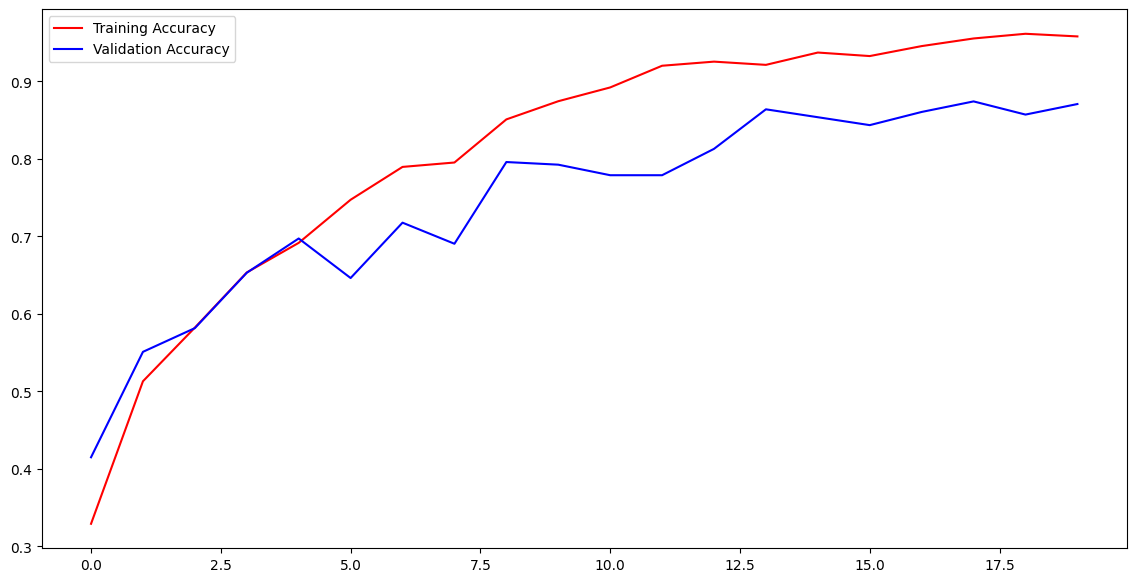

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

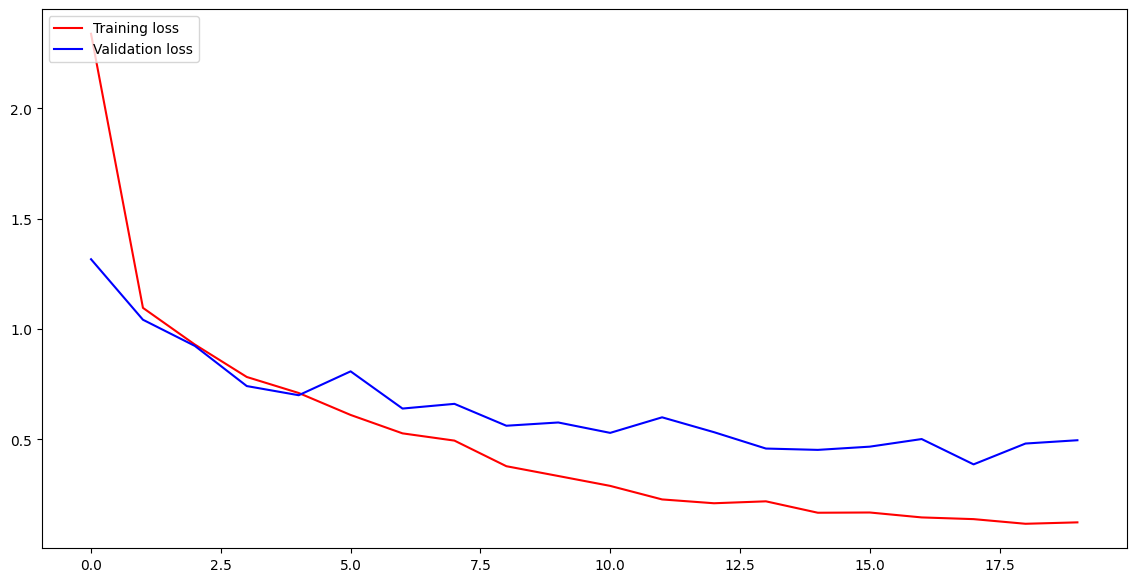

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [ ]:
img = cv2.imread('/content/drive/MyDrive/CNN Implementation/dataset/Testing/meningioma_tumor/image(62).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

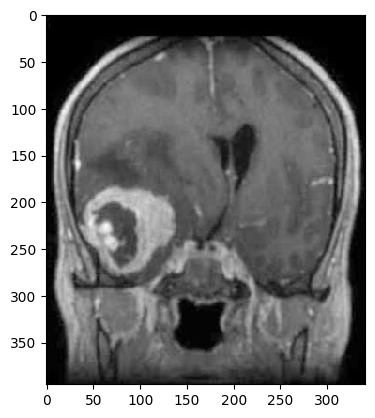

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/CNN Implementation/dataset/Testing/meningioma_tumor/image(62).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
a=model.predict(img_array)
indices = a.argmax()
print(indices)
print("tumor type :", labels[indices])

1/1 [==============================] - 1s 545ms/step
1
tumor type : meningioma_tumor


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
score  = accuracy_score()